# Курсовая работа по дисциплине: Паровые и Газовые турбины.

 | ФИО | Вариант | Тип турбины   | P0, МПа | t0, °C | Pпп, МПа | tпп, °C | Pк, кПа  | tпв,°C | Nэ, МВт | Z, шт | dр.с., м | n, c-1 | H0, кДж/кг |
 |------|------|------|------|------|------|------|------|------|------|------|------|------|------|
 |   Бонадыков Никита Михайлович   | 2 | К-800-23,5 ЛМЗ | 24 | 555 | 3,66 | 552 | 3,4 | 271 | 840 | 8 | 1,2 | 60 | 90 -110 |

In [97]:
#Импорт библиотек
import iapws
from iapws import IAPWS97 as gas
import matplotlib.pyplot as plt
import numpy as np
import Inner_part

In [98]:
#Инициализация параметров расчета  
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [99]:
#Дано
electrical_power = 840 * (10 ** 6)    
p0 = 24 * MPa
t0 = 555
pk = 3.4 * kPa
p_middle = 3.4 * MPa
t_middle = 552
t_feed_water = 271
p_feed_water = 1.4 * p0
z = 8
internal_efficiency = 0.85
mechanical_efficiency = 0.992
generator_efficiency = 0.99

In [100]:
inlet_mass_flow = Inner_part.complite_inlet_mass_flow(p0,t0,p_middle,t_middle,pk,p_feed_water,t_feed_water,internal_efficiency,mechanical_efficiency,generator_efficiency,electrical_power)
condenser_mass_flow = Inner_part.complite_condenser_mass_flow(p0,t0,p_middle,t_middle,pk,p_feed_water,t_feed_water,internal_efficiency,mechanical_efficiency,generator_efficiency,electrical_power)

In [101]:
print("Массовый расход в турбину на входе", inlet_mass_flow)
print("Массовый расход в конденсатор:", condenser_mass_flow)

Массовый расход в турбину на входе 659.3819522129576
Массовый расход в конденсатор: 434.98665331279125


In [182]:
def plot(p0,t0,p_middle,t_middle,pk,internal_efficiency):
    point0 = Inner_part.find_point0(p0,t0,p_middle)            
    point1 = Inner_part.find_point1(p0,t0,p_middle,internal_efficiency)
    point2 = Inner_part.find_point2(p_middle,t_middle,p0,pk,internal_efficiency)
    point_middle = Inner_part.find_point_middle(p_middle,t_middle,p0)
    x1 = [point0[0].s,point0[1].s,point1[1].s]     
    y1 = [point0[0].h,point0[1].h,point1[1].h]   
    x2 = [point_middle[0].s,point_middle[1].s,point2[1].s]   
    y2 = [point_middle[0].h,point_middle[1].h,point2[1].h]
    
    def get_izobar(point):    
        t0k = np.arange(1,800,5)
        t0k = list(map(to_kelvin,t0k))
        point_s = []
        point_h = []
        for i in t0k:
            if (gas(P = point.P, T=i).s > 6 and gas(P = point.P, T=i).s < 9):
                point_s.append(gas(P = point.P, T=i).s)
                point_h.append(gas(P = point.P, T=i).h)   
        plt.plot(point_s, point_h,'b',linewidth=1)
        pass
    
    get_izobar(point0[0])
    get_izobar(point_middle[0])
    get_izobar(point1[0])
    get_izobar(point2[0])
    def get_izoterm(point):
        p_0 = np.arange(0.001,30,0.1)
        p_0 = p_0 * MPa
        point_s = [] 
        point_h = []
        for value in p_0:
            if (gas(P = value * unit, T=point.T).s > 6 and gas(P = value * unit, T=point.T).s < 9):
                point_s.append(gas(P = value * unit, T=point.T).s)
                point_h.append(gas(P = value * unit, T=point.T).h)   
        plt.plot(point_s, point_h,'g',linewidth=1)
        pass
    
    get_izoterm(point0[0])
    get_izoterm(point_middle[0])
    plt.xlabel("S")
    plt.ylabel("H")
    plt.plot()
    plt.plot(x1, y1,'r')
    plt.plot(x2, y2,'r')
    plt.grid()
    plt.show()    

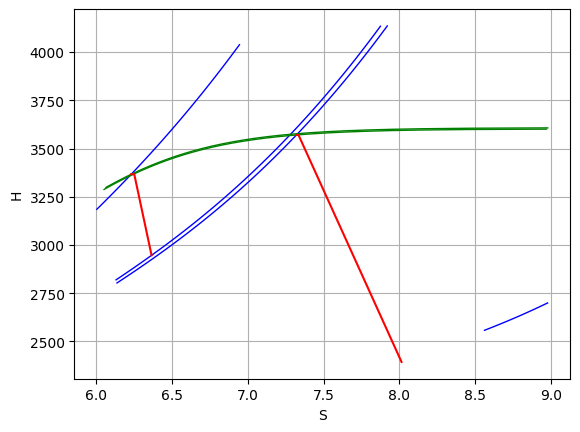

In [183]:
plot(p0,t0,p_middle,t_middle,pk,internal_efficiency)